<a href="https://csdms.colorado.edu"><img style="float: center; width: 75%" src="./media/niag.png"></a>

# River incision

As a first example, we will apply the advection equation to simulate the evolution of Niagara falls after the retreat of the Laurentide ice-sheet. Note that general-style knickpoint retreat is well casted with an advection equation but that specific processes causing waterfalls to retreat (such as plunge pool erosion) are not represented. If you want to learn more on the Niagara escarpment, check out [this webinar](https://www.youtube.com/watch?v=Az7utk0h3Ek). 

## Simulation is approximation 
Every model makes some simplifications. That's what we will do here. 
Create a fluvial profile with a length of 15000m (15 km). All elevations can be set to 75m except the last cell, which is the baselevel at the escarpment and can be set at 0m. Plot the shape of the initial river profile and the knickpoint.

In [2]:
# Import pyhton packages
import matplotlib.pyplot as plt
import numpy as np

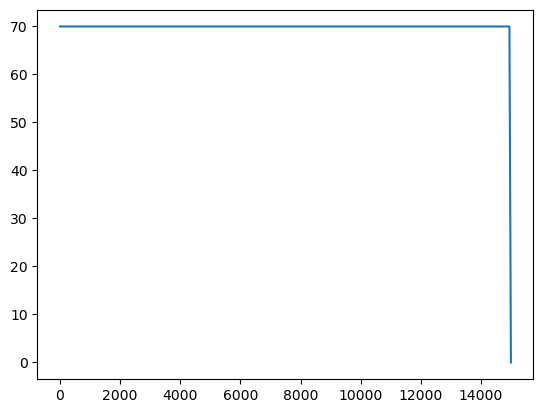

In [3]:
nb_cells = 302
L = 15000
x=np.linspace(0,15000,nb_cells)
z=np.ones(nb_cells)*70
z[-1]= 0
plt.plot(x,z,label='Initial elevation')

Now assume you are right after the retreat of the Laurentide ice sheet 10000 years ago. Advance the knickpoint in time using the numerical advection solver as developed in the [advection notebook](advection.ipynb). You can assume an average wave speed, or knickpoint retreat rate, of 1m/year and run the solution for 10000 years. The outlet of the channel (boundary condition on the right) can be set and fixed to zero throughout the run. Note that the incision wave is running from right to left. What sign is the velocity?

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def advection_solver(T_num,v,dt,dx,run_duration):
    iter = 0
    #Numerical solution 
    while iter * dt < run_duration:
        iter += 1
        if v > 0:
            T_num[1:] -= v * dt / dx * (T_num[1:]-T_num[:-1])
            T_num[0] = 0
        elif v < 0:
            T_num[:-1] -= v * dt / dx * (T_num[1:]-T_num[:-1])
            T_num[-1] = 0
    return T_num

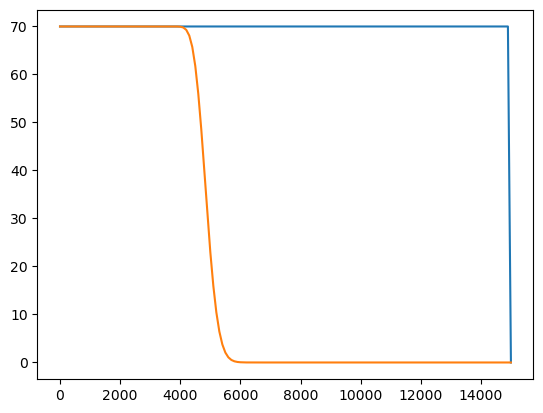

In [9]:
nb_cells = 151
L = 15000
dx = L / (nb_cells-1)
x=np.linspace(0,15000,nb_cells)
z=np.ones(nb_cells)*70
z[-1]= 0
plt.plot(x,z,label='Initial elevation')
v = -1
dt = 0.9*dx/abs(v)
run_duration = 10000
z_num = advection_solver(z,v,dt,dx,run_duration)
plt.plot(x,z_num)

* How far did the knickpoint retreat, is this what you expected?

## Compare to the analytical solution 

* Can you calculate an analytical solution for this case? <br>*Note: the solution from the advection notebook will not work because of fixed boundary conditions in this case (see class)*
* What happens if we increase the time step to 200 year? Redo the numerical simulation. Describe what is going on and explain the mathematical formula we can use to control for this kind of irregularities (we developed this equation in the advection notebook). 
* What is the maximum stable timestep? 


51


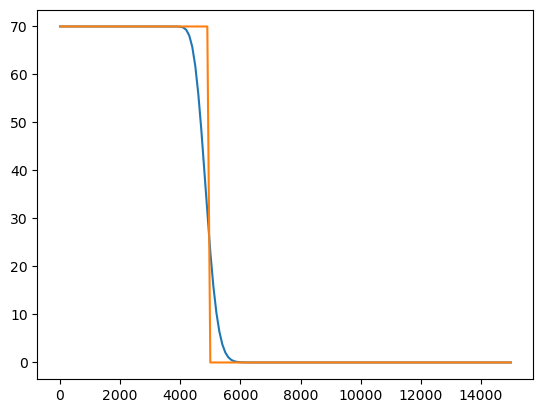

In [11]:
# Calculate analytical solution
# Total shift runtime*v
total_shift = run_duration*v
total_shift_dx = int(total_shift/dx)


total_shift_dx
location_front = nb_cells+total_shift_dx
print(location_front)
z_an = np.ones(nb_cells)*70
z_an[location_front-1:]=0 # Front started at -1 (right corner is base level)
plt.plot(x,z_num)
plt.plot(x,z_an)

## Fluvial incision

Is the kind of incision we simulated realistic in the field? In which cases is it, in which is it not. Build up our argument assuming that fluvial incision into bedrock can be simulated using the stream power law.

## River incision topics:
1. [A general solution for the advection equation](advection.ipynb)
1. [Fluvial incision with the advection equation](fluvial_advection.ipynb)
1. [Stream power law](stream_power_law.ipynb)